In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt, numpy as np, jdcal
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import griddata
import scipy.ndimage
from matplotlib.gridspec import GridSpec

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

In [7]:
from astropy.io import fits
from astropy.visualization import AsinhStretch, ZScaleInterval, ImageNormalize
import numpy as np

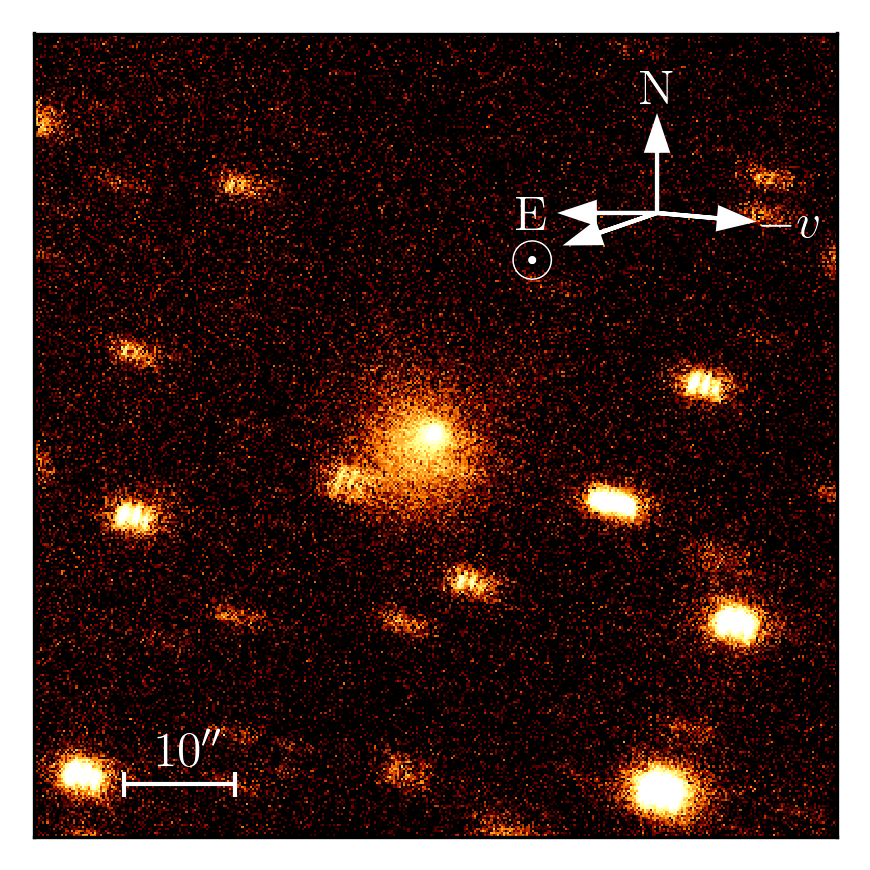

In [67]:
from matplotlib import gridspec

fig = plt.figure(figsize=(3, 3), dpi=300)
gs = gridspec.GridSpec(1, 1)

ax = fig.add_subplot(gs[0, 0])
    
ax.set_autoscale_on(False)

ax.clear()
ax.set_facecolor('k')
    
cmap = 'afmhot'
hdu_list = fits.open('cfht_20130705.fits')
header = hdu_list[0].header
image = hdu_list[0].data
norm = ImageNormalize(image, stretch=AsinhStretch(), vmin=230, vmax=330)
    
ax.imshow(image, cmap=cmap, norm=norm, origin='lower')
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    
psang = 289-90
psamv = 265-90+180

ax.arrow(300, 300, 30*np.cos(np.deg2rad(psang)), 30*np.sin(np.deg2rad(psang)), color='w', head_width=10)
ax.text(230, 270, '$\odot$', color='w', fontsize='x-large', weight='black')

ax.arrow(300, 300, 30*np.cos(np.deg2rad(psamv)), 30*np.sin(np.deg2rad(psamv)), color='w', head_width=10)
ax.text(350, 290, '$-v$', color='w', fontsize='large', weight='black')

ax.arrow(300, 300, -30, 0, color='w', head_width=10)
ax.arrow(300, 300, 0, 30, color='w', head_width=10)
ax.text(232, 292, 'E', color='w', fontsize='large', weight='black')
ax.text(292, 352, 'N', color='w', fontsize='large', weight='black')
    
ax.errorbar(70, 25, xerr=26.7, color='w', lw=1, capsize=3)
ax.text(59, 33, r"$10''$", color='w', fontsize='large')

fig.tight_layout()
plt.savefig('cfht_stack.pdf', dpi=300)
plt.show()